In [1]:
# libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Data 
from torchvision.transforms import transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets

# Neural Net
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

# **Loading Data**

In [2]:
testing_path = "../input/brain-tumor-classification-mri/Testing"
training_path = "../input/brain-tumor-classification-mri/Training"

In [3]:
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(350),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5, 0.5, 0.5))
])

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5, 0.5, 0.5))
])

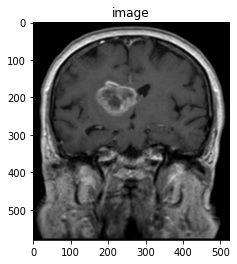

In [4]:
plt.title('image')
image = mpimg.imread("../input/brain-tumor-classification-mri/Testing/glioma_tumor/image(12).jpg")
plt.imshow(image)
plt.show()

In [5]:
train_data = datasets.ImageFolder(training_path, transform=train_transforms)
test_data = datasets.ImageFolder(testing_path, transform=test_transforms)
train_data, val_data = torch.utils.data.random_split(train_data, [2670, 200])

In [6]:
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(dataset=val_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=64, shuffle=True)

# **Visualizing Data**

In [7]:
def imgshow(img):
    img = img/2 + 0.5
    plt.imshow(np.transpose(img, (1, 2, 0)))

In [8]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()
images.shape

(64, 3, 350, 350)

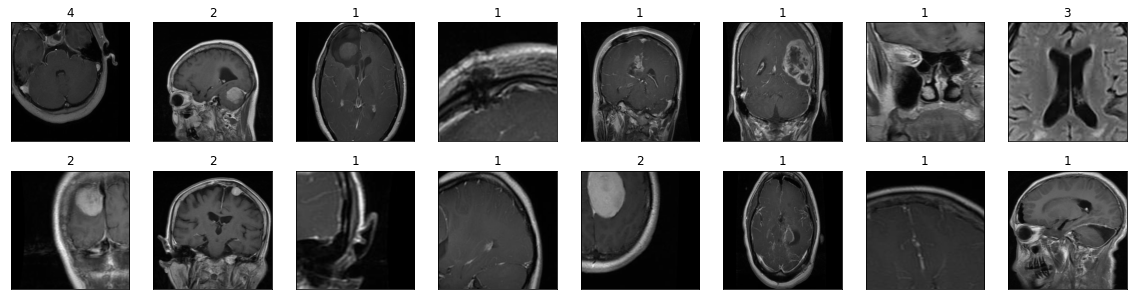

In [9]:
fig = plt.figure(figsize=(20, 5))

classes = ["1", "2", "3","4"]

for i in np.arange(16):
    ax = fig.add_subplot(2, 8, i+1, xticks=[], yticks=[])
    imgshow(images[i])
    ax.set_title(classes[labels[i]])